# Feature Scaling  - Standarization


In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('dataset\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#df =df.iloc[:,2:] 
#print(df.head())

In [79]:
df.sample(5) # generate random sample of data from dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
655,2,155,52,27,540,38.7,0.240,25,1
176,6,85,78,0,0,31.2,0.382,42,0
476,2,105,80,45,191,33.7,0.711,29,1
507,1,130,60,23,170,28.6,0.692,21,0
28,13,145,82,19,110,22.2,0.245,57,0


# Train test split

In [65]:
from sklearn.model_selection import train_test_split

In [80]:
x = df.drop(columns = 'Outcome' ,axis= 1)


In [81]:
y = df['Outcome']

In [82]:
X_train, X_test ,Y_train ,Y_test  = train_test_split(x,y,test_size= .3 ,random_state= 2)


In [83]:
X_train.shape ,X_test.shape

((537, 8), (231, 8))

# StandardScaler

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
scaler.fit(X_train)


StandardScaler()

In [96]:
X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [97]:
X_train_Scaled = pd.DataFrame(X_train_Scaled, columns = X_train.columns)
X_test_Scaled = pd.DataFrame(X_test_Scaled, columns = X_test.columns)

In [ ]:
np.round(X_train.describe(),1) # before Scaling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.0,537.0,537.0,537.0,537.0,537.0,537.0,537.0
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-3.9,-3.7,-1.3,-0.7,-4.1,-1.2,-1.1
25%,-0.9,-0.7,-0.3,-1.3,-0.7,-0.6,-0.7,-0.8
50%,-0.3,-0.1,0.1,0.2,-0.4,0.0,-0.3,-0.4
75%,0.6,0.6,0.6,0.8,0.4,0.6,0.4,0.6
max,3.8,2.5,2.8,2.5,5.5,4.5,5.2,3.3


In [ ]:
np.round(X_train_Scaled.describe(),1)  # after Scaling

# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

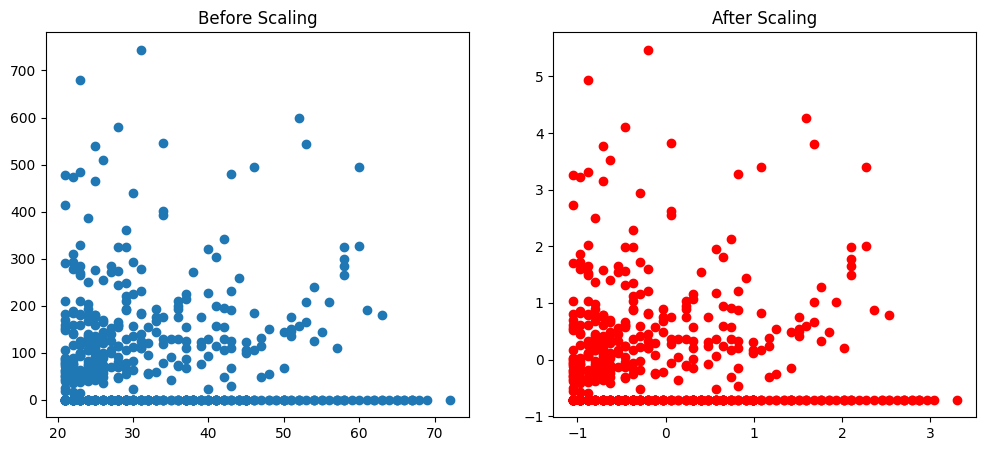

In [104]:
fig ,(ax1,ax2) = plt.subplots(ncols = 2 ,figsize = (12,5))
#before Scaling
ax1.scatter(X_train['Age'],X_train['Insulin'])
ax1.set_title("Before Scaling")
#After Scaling
ax2.scatter(X_train_Scaled['Age'],X_train_Scaled['Insulin'], color ='red')
ax2.set_title("After Scaling")

Text(0.5, 1.0, 'After Scaling')

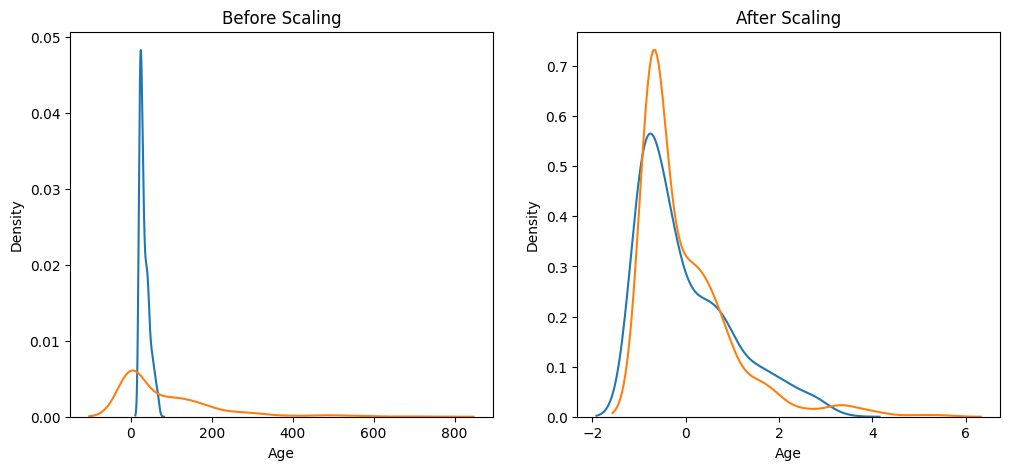

In [106]:
fig ,(ax1,ax2) = plt.subplots(ncols = 2 ,figsize = (12,5))
#before Scaling
sns.kdeplot(X_train['Age'],ax =ax1)
sns.kdeplot(X_train['Insulin'],ax =ax1)

ax1.set_title("Before Scaling")
#After Scaling
sns.kdeplot(X_train_Scaled['Age'],  ax=ax2)
sns.kdeplot(X_train_Scaled['Insulin'], ax =ax2)
ax2.set_title("After Scaling")

# Why Scaling is Important

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()
lr_Scaled = LinearRegression()

In [110]:
lr.fit(X_train,Y_train)
lr_Scaled.fit(X_train_Scaled,Y_train)

LinearRegression()

In [111]:
y_pred = lr.predict(X_test)
y_pred_Scaled = lr_Scaled.predict(X_test_Scaled)

In [112]:
from sklearn.metrics import accuracy_score

In [115]:
print("Actual :" , accuracy_score(Y_test,y_pred))
print("Scaled :" ,accuracy_score(Y_test ,y_pred_Scaled))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Effect of Outlier